In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Проверка версии TensorFlow
print("TensorFlow version:", tf.__version__)



TensorFlow version: 2.20.0


In [7]:
# Загрузка данных из CSV-файла
df = pd.read_csv('../data/The_Cancer_data_1500_V2.csv')
df.head()  # Показать первые 5 строк

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [8]:
# Общая информация, она покажет типы данных, количество непустых значений и общее число строк/столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [9]:
# Описательная статистика для числовых признаков, покажет среднее, стандартное отклонение, минимум, максимум
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,50.320000,17.640968,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1500.0,0.490667,0.500080,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,1500.0,27.513321,7.230012,15.000291,21.483134,27.598494,33.850837,39.958688
Smoking,1500.0,0.269333,0.443761,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1500.0,0.508667,0.678895,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1500.0,4.897929,2.866162,0.002410,2.434609,4.834316,7.409896,9.994607
AlcoholIntake,1500.0,2.417987,1.419318,0.001215,1.210598,2.382971,3.585624,4.987115
CancerHistory,1500.0,0.144000,0.351207,0.000000,0.000000,0.000000,0.000000,1.000000
Diagnosis,1500.0,0.371333,0.483322,0.000000,0.000000,0.000000,1.000000,1.000000


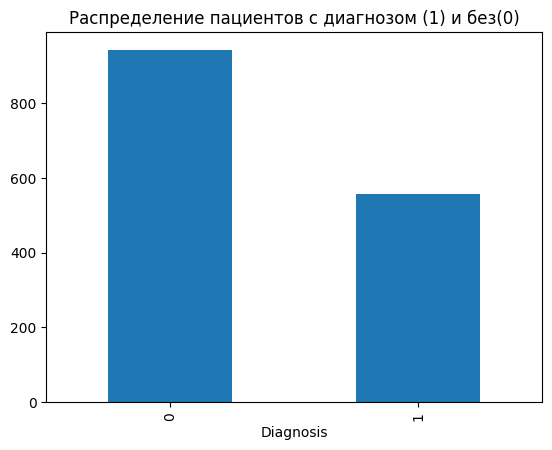

Доля пациентов с раком:
Diagnosis
0    0.628667
1    0.371333
Name: proportion, dtype: float64


In [16]:
# Сколько пациентов с раком (1) и без (0)
df['Diagnosis'].value_counts().plot(kind='bar', title='Распределение пациентов с диагнозом (1) и без(0)')
plt.show()

# В виде процентов
print("Доля пациентов с раком:")
print(df['Diagnosis'].value_counts(normalize=True))

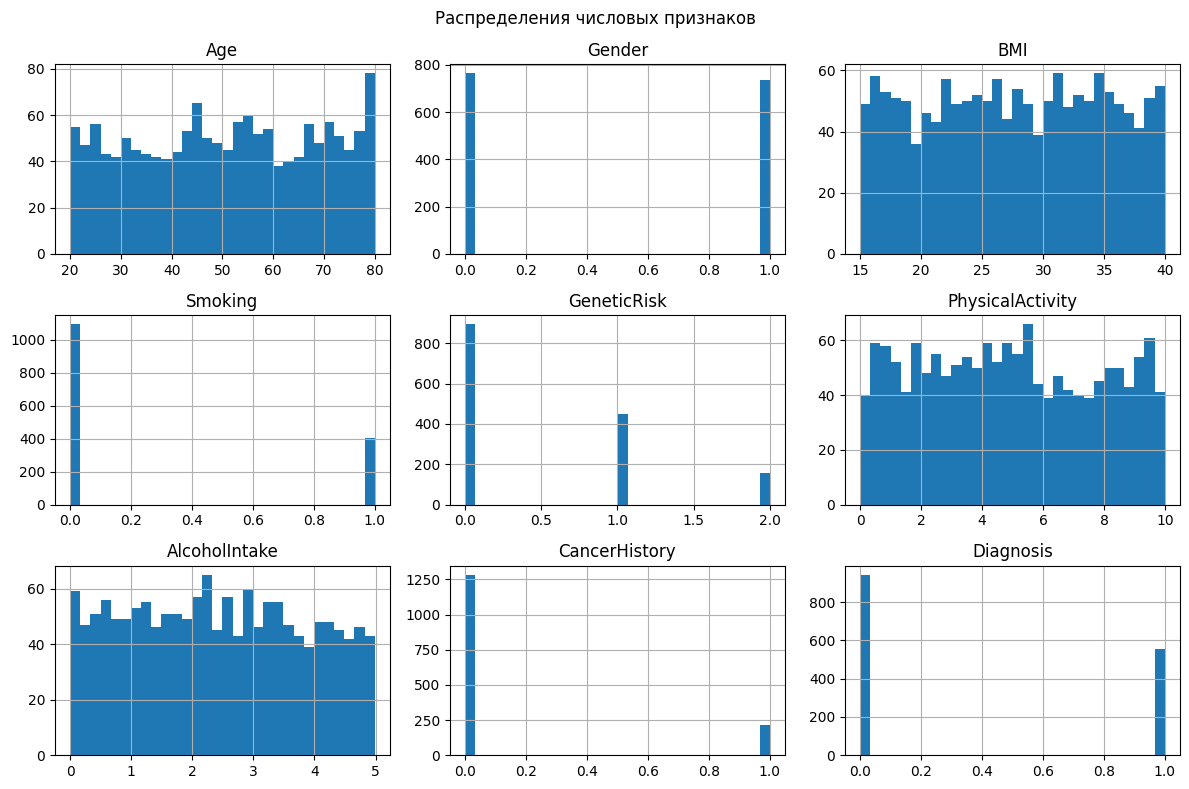

In [11]:
# Гистограммы всех числовых признаков, поможет увидеть, нормально ли распределены данные, есть ли выбросы
df.hist(bins=30, figsize=(12, 8))
plt.suptitle('Распределения числовых признаков')
plt.tight_layout()
plt.show()

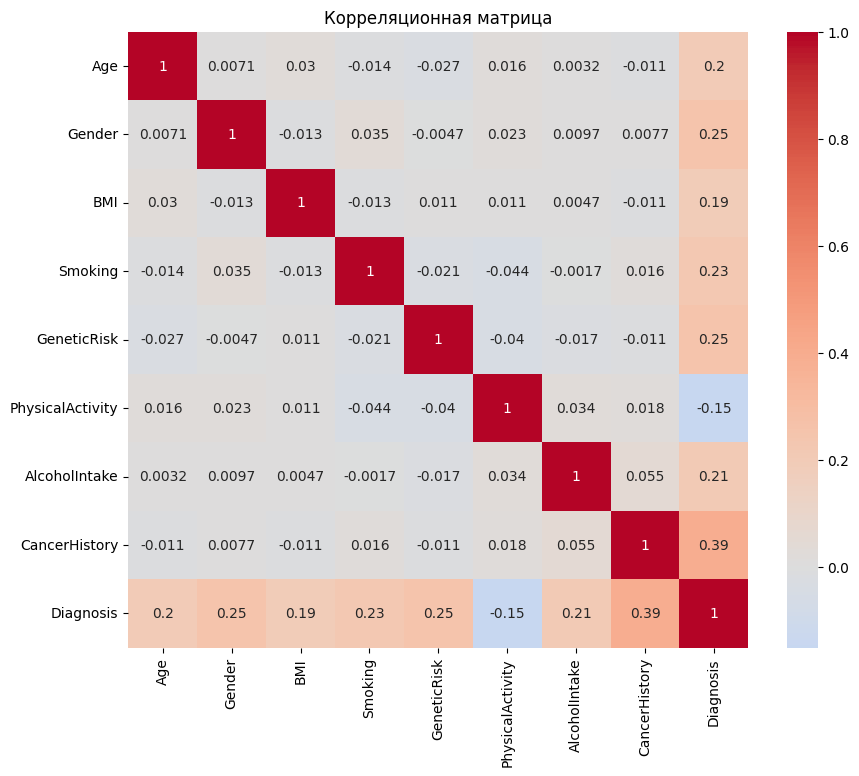

In [12]:
# Корреляция между всеми признаками(какие признаки сильно коррелируют с диагнозом)
# Например, если GeneticRisk имеет высокую положительную корреляцию - это поддерживает гипотезу о роли генетики 
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

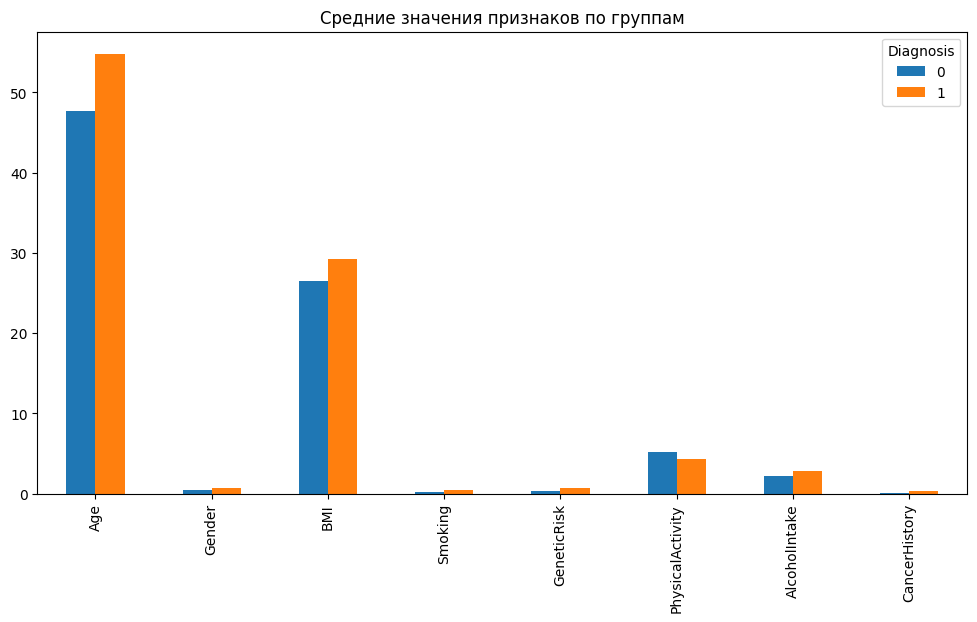

In [13]:
# Сравним средние значения признаков для группы с раком и без. Это покажет, какие признаки в среднем выше/ниже у больных раком.
df.groupby('Diagnosis').mean().T.plot(kind='bar', figsize=(12, 6), title='Средние значения признаков по группам')
plt.show()

In [17]:
# Выбираем только признаки из гипотезы + целевую переменную
features = ['Age', 'BMI', 'Smoking', 'AlcoholIntake', 'GeneticRisk']
X = df[features].values  # признаки
y = df['Diagnosis'].values  # целевая переменная (0 или 1)

print("Форма X:", X.shape)
print("Форма y:", y.shape)

Форма X: (1500, 5)
Форма y: (1500,)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Пример нормализованных данных:")
print(X_scaled[:3])

Пример нормализованных данных:
[[ 0.43549546 -1.58116185 -0.60713519  1.21946526  0.72396612]
 [ 1.17266226  0.45872244 -0.60713519  0.77647404  0.72396612]
 [-0.13155592  1.55954393 -0.60713519  1.62835335  2.19743855]]


In [19]:
from sklearn.model_selection import train_test_split

# Разделяем: 80% — обучение, 20% — тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 1200
Test size: 300


Программа ожидает вход в виде 3D-тензора: (samples, timesteps, features)
В нашем случае — каждый пациент = "1D-изображение" из 5 признаков.

In [20]:
import numpy as np

# Преобразуем в форму (n_samples, n_features, 1)
X_train_cnn = np.expand_dims(X_train, axis=2) 
X_test_cnn = np.expand_dims(X_test, axis=2)

print("Форма для CNN:")
print("X_train_cnn:", X_train_cnn.shape)  # (1200)
print("X_test_cnn:", X_test_cnn.shape)    # (300)

Форма для CNN:
X_train_cnn: (1200, 5, 1)
X_test_cnn: (300, 5, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# построение и обучение модели 1D-CNN
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(5, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

# Компилируем
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Выводим архитектуру
model.summary()

c:\Users\Lenovo\Desktop\cancer-prediction-cnn\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Обучение модели
history = model.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7406 - loss: 0.5487 - val_accuracy: 0.6917 - val_loss: 0.5923
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.5529 - val_accuracy: 0.6917 - val_loss: 0.5919
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7354 - loss: 0.5437 - val_accuracy: 0.7000 - val_loss: 0.5914
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.5450 - val_accuracy: 0.6958 - val_loss: 0.5960
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7500 - loss: 0.5412 - val_accuracy: 0.6958 - val_loss: 0.5941
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7479 - loss: 0.5517 - val_accuracy: 0.6917 - val_loss: 0.5921
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7385 - loss: 0.5415 - val_accuracy: 0.6917 - val_loss: 0.5945
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.5451 - val_accuracy: 0.6917 - val_loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

ROC-AUC: 0.7235

Classification Report:
              precision    recall  f1-score   support

   No Cancer       0.74      0.88      0.80       189
      Cancer       0.70      0.46      0.55       111

    accuracy                           0.73       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.72      0.73      0.71       300



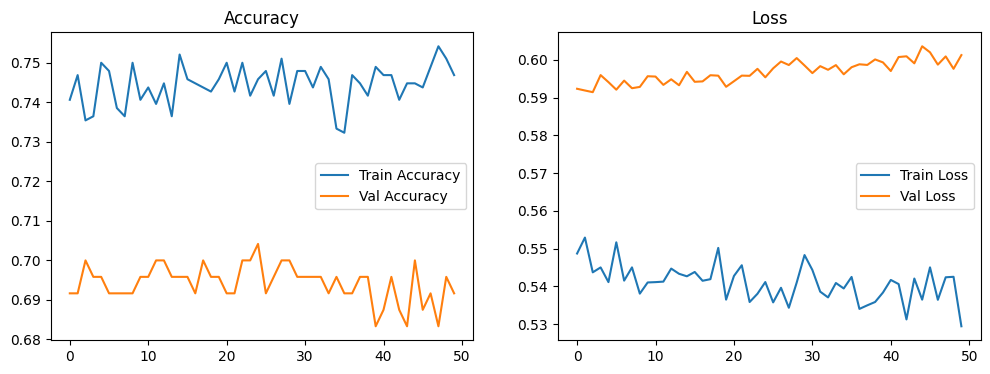

In [25]:
# Оценка модели
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Предсказания на тесте
y_pred_proba = model.predict(X_test_cnn)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# ROC-AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC: {auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Cancer', 'Cancer']))

# График обучения
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

Проверялась гипотеза о том, что комбинация факторов образа жизни (возраст, ИМТ, употребление алкоголя, курение) и генетической предрасположенности является значимым предиктором наличия рака.
ROC-AUC — это показатель того, насколько хорошо модель умеет разделять классы (рак / нет рака). Значение 0.5 — случайное угадывание, 1.0 — идеальная модель.
Модель показала ROC-AUC = 0.7235. Это лучше случайного угадывания, но не идеально. Я делаю вывод, что гипотеза подтверждается, так как выбранные признаки позволяют предсказывать наличие рака с вероятностью, выше случайной.
Модель хорошо работает с пациентами без рака (высокий recall = мало ложно отрицательных).
Плохо работает с пациентами, у которых есть рак (низкий recall = много ложных отрицательных — модель пропускает больных)
Для практического использования необходимо улучшить чувствительность модели. Например, за счёт балансировки классов или добавления дополнительных признаков.


Объяснение таблицы Classification Report: 
Precision (точность): 0.74 — из всех случаев, которые модель предсказала как "нет рака", 74% действительно были без рака.
Recall (полнота): 0.88 — модель правильно нашла 88% всех реальных случаев без рака.
